### Importing Libraries

In [1]:
import cv2
import dlib
import sys
import os
import face_recognition
from FaceRecognitionClass import FaceRecognitionClass
# to measure exec time
from timeit import default_timer as timer

### Dataset

In [50]:
# Encode faces from a dataset folder
datasetpath = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset'

### Reading Dataset -> Getting Facial Encodings of Dataset Images

In [51]:
start = timer()
faceclass = FaceRecognitionClass()
faceclass.load_encoding_images(datasetpath)
print("Dataset Encoding Time", timer()-start)

93 encoding images found.
Encoding images loaded
Dataset Encoding Time 121.54673430000003


### Live Input

In [6]:
# Load Camera
cap = cv2.VideoCapture(0)


while True:
    ret, frame = cap.read()

    # Detect Faces
    face_locations, face_names = faceclass.detect_known_faces(frame)
    for face_loc, name in zip(face_locations, face_names):
        y1, x2, y2, x1 = face_loc[0], face_loc[1], face_loc[2], face_loc[3]

        cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 200), 2)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 200), 4)

    cv2.imshow('frame', frame)

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

### Testing

In [46]:
import glob

def test_images(test_image_dir, train_img_dir, test_dataset_dir, testor):
    
    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0

    test_img = cv2.imread(test_image_dir)
    rgb_test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img_encoding = face_recognition.face_encodings(rgb_test_img)[0]

    dir_train_image_encodings  = []
    train_img_dir = glob.glob(os.path.join(train_img_dir, "*.*")) 

    for i in train_img_dir:
        img = cv2.imread(i)
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_encoding = face_recognition.face_encodings(rgb_img)[0]
        dir_train_image_encodings.append(img_encoding)

    lst = []
    for i in dir_train_image_encodings:
        result = face_recognition.compare_faces([i], test_img_encoding,  tolerance=0.6)
        lst.append(str(result[0]))

    # print(lst)

    true_positive = lst.count('True')
    false_negative = lst.count('False')

    image_paths = []
    for root, subdirectories, files in os.walk(test_dataset_dir):
        # print(subdirectories)
        for file in files:
            temp = os.path.join(root, file)
            if testor not in temp:
                image_paths.append(temp)
    # print(image_paths)

    lst1 = []
    testor_image_encodings = []
    for i in image_paths:
        img = cv2.imread(i)
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_encoding = face_recognition.face_encodings(rgb_img)[0]
        testor_image_encodings.append(img_encoding)

    for i in testor_image_encodings:
        result = face_recognition.compare_faces([i], test_img_encoding,  tolerance=0.6)
        lst1.append(str(result[0]))

    # print(lst1)
    false_positive = lst.count('True')
    true_negative = lst1.count('False')

    return true_positive,true_negative,false_positive,false_negative, lst, lst1


In [48]:
def evaluate(tp, tn, fp, fn):
    acc = (tp+tn)/(tp+tn+fp+fn)
    pres = tp/(tp+fp)
    recal = tp/(tp+fn)
    print("Accuarcy:",acc)
    print("Precision:",pres)
    print("Recall:",recal)
    return acc, pres, recal

In [37]:
test_dataset_path = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset'

- Imran Khan

In [47]:
test_image = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//ImranKhan//ImranKhan_1.jpg'
train_dir_path = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//ImranKhan'
imrankhan_results = test_images(test_image, train_dir_path, test_dataset_path,"ImranKhan")

In [49]:
print("True Positives:", imrankhan_results[0])
print("True Negatives:", imrankhan_results[1])
print("False Positives:", imrankhan_results[2])
print("False Negatives:", imrankhan_results[3])

imran_score = evaluate(imrankhan_results[0], imrankhan_results[1], imrankhan_results[2], imrankhan_results[3])

True Positives: 7
True Negatives: 85
False Positives: 7
False Negatives: 0
Accuarcy: 0.9292929292929293
Precision: 0.5
Recall: 1.0


- Niha Momin

In [52]:
test_image = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//nm05153//nm05153_1.jpg'
train_dir_path = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//nm05153'
nm05153_results = test_images(test_image, train_dir_path, test_dataset_path,"nm05153")

In [53]:
print("True Positives:", nm05153_results[0])
print("True Negatives:", nm05153_results[1])
print("False Positives:", nm05153_results[2])
print("False Negatives:", nm05153_results[3])

nm05153_score = evaluate(nm05153_results[0], nm05153_results[1], nm05153_results[2], nm05153_results[3])

True Positives: 10
True Negatives: 83
False Positives: 10
False Negatives: 0
Accuarcy: 0.9029126213592233
Precision: 0.5
Recall: 1.0


- Aiman Haq

In [54]:
test_image = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//ah04318//ah04318_1.jpeg'
train_dir_path = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//ah04318'
ah04318_results = test_images(test_image, train_dir_path, test_dataset_path,"ah04318")

In [55]:
print("True Positives:", ah04318_results[0])
print("True Negatives:", ah04318_results[1])
print("False Positives:", ah04318_results[2])
print("False Negatives:", ah04318_results[3])

ah04318_score = evaluate(ah04318_results[0], ah04318_results[1], ah04318_results[2], ah04318_results[3])

True Positives: 10
True Negatives: 83
False Positives: 10
False Negatives: 0
Accuarcy: 0.9029126213592233
Precision: 0.5
Recall: 1.0


- Benazir Bhutto

In [56]:
test_image = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//BenazirBhutto//BenazirBhutto_1.jpg'
train_dir_path = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//BenazirBhutto'
BenazirBhutto_results = test_images(test_image, train_dir_path, test_dataset_path,"BenazirBhutto")

In [57]:
print("True Positives:", BenazirBhutto_results[0])
print("True Negatives:", BenazirBhutto_results[1])
print("False Positives:", BenazirBhutto_results[2])
print("False Negatives:", BenazirBhutto_results[3])

BenazirBhutto_score = evaluate(BenazirBhutto_results[0], BenazirBhutto_results[1], BenazirBhutto_results[2], BenazirBhutto_results[3])

True Positives: 9
True Negatives: 83
False Positives: 9
False Negatives: 1
Accuarcy: 0.9019607843137255
Precision: 0.5
Recall: 0.9


- Elon Musk

In [58]:
test_image = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//ElonMusk//ElonMusk_1.jpg'
train_dir_path = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//ElonMusk'
ElonMusk_results = test_images(test_image, train_dir_path, test_dataset_path,"ElonMusk")

In [59]:
print("True Positives:", ElonMusk_results[0])
print("True Negatives:", ElonMusk_results[1])
print("False Positives:", ElonMusk_results[2])
print("False Negatives:", ElonMusk_results[3])

ElonMusk_score = evaluate(ElonMusk_results[0], ElonMusk_results[1], ElonMusk_results[2], ElonMusk_results[3])

True Positives: 10
True Negatives: 83
False Positives: 10
False Negatives: 0
Accuarcy: 0.9029126213592233
Precision: 0.5
Recall: 1.0


- Hamza Irfan

In [60]:
test_image = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//hi05466//hi05466_1.jpeg'
train_dir_path = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//hi05466'
hi05466_results = test_images(test_image, train_dir_path, test_dataset_path,"hi05466")

In [61]:
print("True Positives:", hi05466_results[0])
print("True Negatives:", hi05466_results[1])
print("False Positives:", hi05466_results[2])
print("False Negatives:", hi05466_results[3])

hi05466_score = evaluate(hi05466_results[0], hi05466_results[1], hi05466_results[2], hi05466_results[3])

True Positives: 10
True Negatives: 83
False Positives: 10
False Negatives: 0
Accuarcy: 0.9029126213592233
Precision: 0.5
Recall: 1.0


- Junaid Jamshed

In [62]:
test_image = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//JunaidJamshed//JunaidJamshed_1.jpg'
train_dir_path = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//JunaidJamshed'
JunaidJamshed_results = test_images(test_image, train_dir_path, test_dataset_path,"JunaidJamshed")

In [63]:
print("True Positives:", JunaidJamshed_results[0])
print("True Negatives:", JunaidJamshed_results[1])
print("False Positives:", JunaidJamshed_results[2])
print("False Negatives:", JunaidJamshed_results[3])

JunaidJamshed_score = evaluate(JunaidJamshed_results[0], JunaidJamshed_results[1], JunaidJamshed_results[2], JunaidJamshed_results[3])

True Positives: 10
True Negatives: 83
False Positives: 10
False Negatives: 0
Accuarcy: 0.9029126213592233
Precision: 0.5
Recall: 1.0


- Mark Zuckerberg

In [64]:
test_image = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//MarkZuckerberg//MarkZuckerberg_1.jpg'
train_dir_path = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//MarkZuckerberg'
MarkZuckerberg_results = test_images(test_image, train_dir_path, test_dataset_path,"MarkZuckerberg")

In [66]:
print("True Positives:", MarkZuckerberg_results[0])
print("True Negatives:", MarkZuckerberg_results[1])
print("False Positives:", MarkZuckerberg_results[2])
print("False Negatives:", MarkZuckerberg_results[3])

MarkZuckerberg_score = evaluate(MarkZuckerberg_results[0], MarkZuckerberg_results[1], MarkZuckerberg_results[2], MarkZuckerberg_results[3])

True Positives: 9
True Negatives: 83
False Positives: 9
False Negatives: 1
Accuarcy: 0.9019607843137255
Precision: 0.5
Recall: 0.9


- Sania Mirza

In [65]:
test_image = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//SaniaMirza//SaniaMirza_1.jpg'
train_dir_path = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//SaniaMirza'
SaniaMirza_results = test_images(test_image, train_dir_path, test_dataset_path,"SaniaMirza")

In [67]:
print("True Positives:", SaniaMirza_results[0])
print("True Negatives:", SaniaMirza_results[1])
print("False Positives:", SaniaMirza_results[2])
print("False Negatives:", SaniaMirza_results[3])

SaniaMirza_score = evaluate(SaniaMirza_results[0], SaniaMirza_results[1], SaniaMirza_results[2], SaniaMirza_results[3])

True Positives: 10
True Negatives: 81
False Positives: 10
False Negatives: 0
Accuarcy: 0.900990099009901
Precision: 0.5
Recall: 1.0


- Uzair Khoso

In [68]:
test_image = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//uk04348//uk04348_1.jpeg'
train_dir_path = r'C://Users//UZIMA//OneDrive//Desktop//Final Face Recognition Parwaaz//face-recognition//test_dataset//uk04348'
uk04348_results = test_images(test_image, train_dir_path, test_dataset_path,"uk04348")

In [69]:
print("True Positives:", uk04348_results[0])
print("True Negatives:", uk04348_results[1])
print("False Positives:", uk04348_results[2])
print("False Negatives:", uk04348_results[3])

uk04348_score = evaluate(uk04348_results[0], uk04348_results[1], uk04348_results[2], uk04348_results[3])

True Positives: 6
True Negatives: 87
False Positives: 6
False Negatives: 0
Accuarcy: 0.9393939393939394
Precision: 0.5
Recall: 1.0


## Final Results

In [73]:
people = []
for root, subdirectories, files in os.walk(test_dataset_path):
    people = subdirectories
    # print(subdirectories)
    break
print(people)

['ah04318', 'BenazirBhutto', 'ElonMusk', 'hi05466', 'ImranKhan', 'JunaidJamshed', 'MarkZuckerberg', 'nm05153', 'SaniaMirza', 'uk04348']


In [76]:
people_results = [ah04318_results, BenazirBhutto_results, ElonMusk_results, hi05466_results, imrankhan_results, JunaidJamshed_results, MarkZuckerberg_results, nm05153_results, SaniaMirza_results, uk04348_results ]
print(people_results)

[(10, 83, 10, 0, ['True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True'], ['False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False']), (9, 83, 9, 1, ['True', 'True', 'False', 'True', 'True', 'True', 'True', 'True', 'True', 'True'], ['False', 'False', 'False', 'False', 'False', 'False',

In [78]:
people_scores = [ah04318_score, BenazirBhutto_score, ElonMusk_score, hi05466_score, imran_score, JunaidJamshed_score, MarkZuckerberg_score, nm05153_score, SaniaMirza_score, uk04348_score ]
people_scores

[(0.9029126213592233, 0.5, 1.0),
 (0.9019607843137255, 0.5, 0.9),
 (0.9029126213592233, 0.5, 1.0),
 (0.9029126213592233, 0.5, 1.0),
 (0.9292929292929293, 0.5, 1.0),
 (0.9029126213592233, 0.5, 1.0),
 (0.9019607843137255, 0.5, 0.9),
 (0.9029126213592233, 0.5, 1.0),
 (0.900990099009901, 0.5, 1.0),
 (0.9393939393939394, 0.5, 1.0)]

In [92]:
accuracy = 0
precision = 0
recall = 0

accuracy_lst = []
precision_lst = []
recall_lst = []

for i in people_scores:
    accuracy += i[0]
    accuracy_lst.append(i[0])
    precision += i[1]
    precision_lst.append(i[1])
    recall += i[2]
    recall_lst.append(i[2])

mean_accuracy = accuracy/len(people_scores)
mean_precision = precision/len(people_scores)
mean_recall = recall/len(people_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)

Mean Accuracy: 0.9088161643120338
Mean Precision: 0.5
Mean Recall: 0.9800000000000001


In [86]:
tp_list = []
tn_list = []
fp_list = []
fn_list = []

for i in people_results:
    tp_list.append(i[0])
    tn_list.append(i[1])
    fp_list.append(i[2])
    fn_list.append(i[3])

print(tp_list)
print(tn_list)
print(fp_list)
print(fn_list)

[10, 9, 10, 10, 7, 10, 9, 10, 10, 6]
[83, 83, 83, 83, 85, 83, 83, 83, 81, 87]
[10, 9, 10, 10, 7, 10, 9, 10, 10, 6]
[0, 1, 0, 0, 0, 0, 1, 0, 0, 0]


## Visualizations

In [84]:
import numpy as np
import matplotlib.pyplot as plt

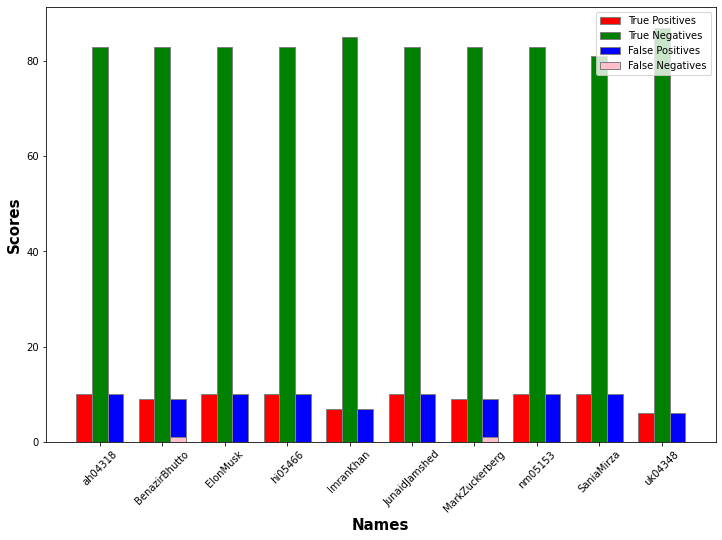

In [91]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(fp_list))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, tp_list, color ='r', width = barWidth,
		edgecolor ='grey', label ='True Positives')
plt.bar(br2, tn_list, color ='g', width = barWidth,
		edgecolor ='grey', label ='True Negatives')
plt.bar(br3, fp_list, color ='b', width = barWidth,
		edgecolor ='grey', label ='False Positives')
plt.bar(br3, fn_list, color ='pink', width = barWidth,
		edgecolor ='grey', label ='False Negatives')

# Adding Xticks
plt.xlabel('Names', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(people))], people)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.legend()
plt.show()


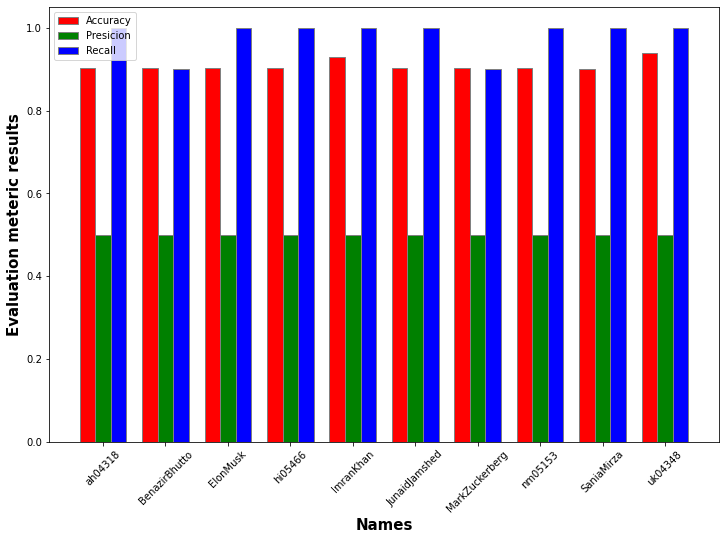

In [93]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(fp_list))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, accuracy_lst, color ='r', width = barWidth,
		edgecolor ='grey', label ='Accuracy')
plt.bar(br2, precision_lst, color ='g', width = barWidth,
		edgecolor ='grey', label ='Presicion')
plt.bar(br3, recall_lst, color ='b', width = barWidth,
		edgecolor ='grey', label ='Recall')

# Adding Xticks
plt.xlabel('Names', fontweight ='bold', fontsize = 15)
plt.ylabel('Evaluation meteric results', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(people))], people)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.legend()
plt.show()
